# **Projet IA: Suivi de la réussite étudiante**

 

**<u>Objectif:</u>**  Déterminer les étudiants à risque d'échec afin de mieux les accompagner en vue de leur réussite académique; 

* Identifier les facteurs importants qui affectent les performances académiques de l'étudiant 
* Prédiction de la note à l'examen finale de l'étudiant 
* Classifier les étudiants en catégories potentielles "Réussite" ou "Échec" 

**<u>Description des caractéristiques:</u>**
* **Student_ID :** Identifiant unique pour chaque étudiant. 

* **Gender :** Sexe de l'étudiant (Homme/Femme). 
* **Study_Hours_per_Week :** Nombre moyen d'heures d'étude par semaine. 
* **Attendance_Rate :** Pourcentage d'assiduité (50% - 100%). 
* **Past_Exam_Scores :** Note moyenne des examens précédents (50 - 100). 
* **Parental_Education_Level :** Niveau d'éducation des parents (Lycée, Licence, Master, Doctorat). 
* **Internet_Access_at_Home :** Indique si l'étudiant a un accès à Internet à la maison (Oui/Non). 
* **Extracurricular_Activities :** Indique si l'étudiant participe à des activités parascolaires (Oui/Non). 
* **Final_Exam_Score (Target) :** La note à l'examen final de l'étudiant (50 - 100, valeurs entières). 
* **Pass_Fail (Target) :** Le statut de l'étudiant (Réussite/Échec). 

## **Analyse Exploratoire des Données (EDA)**

**Compréhension des données**
   * Aperću général (dimension du dataset, types de variables, résumé statistiques et autres)
   * Analyse univariée (Étudier les variables une par une)
   * Analyse bivariée (Explorer les relations entre les variables)
   * Détection d'anomalies (Identifier les outliers, valeurs extrêmes ou abérantes)
   * Valeurs manquantes (Réperer les colonnes ou lignes incomplètes)
   * Distribution du jeu de données (Comment les données sont réparties)

In [68]:
# Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random
import os
from sklearn import set_config

# Définir la graine aléatoire
# Reproducibilité
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

# Définir `random_state=SEED` comme paramètre pour
# S'assurer de la reproducibilité

### (a) **Aperću général**

In [69]:
# Charger le jeu de données
students_df = pd.read_csv("../data/raw/student_performance_dataset.csv")
students_df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [70]:
# La colonne 'Student_ID' est superflue, non importante
students_df = students_df.drop(columns=['Student_ID'])
students_df.head()

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,Male,16,78.222927,73,PhD,No,No,50,Fail
2,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [71]:
# Informations du jeu de données
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      708 non-null    object 
 1   Study_Hours_per_Week        708 non-null    int64  
 2   Attendance_Rate             708 non-null    float64
 3   Past_Exam_Scores            708 non-null    int64  
 4   Parental_Education_Level    708 non-null    object 
 5   Internet_Access_at_Home     708 non-null    object 
 6   Extracurricular_Activities  708 non-null    object 
 7   Final_Exam_Score            708 non-null    int64  
 8   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 49.9+ KB


In [72]:
students_df.shape # La taille de notre df

(708, 9)

In [73]:
# Résumé statistique des données numériques
students_df.describe()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,708.000000,708.000000,708.000000,708.000000
mean,26.132768,78.107722,77.871469,58.771186
std,8.877727,13.802802,14.402739,6.705877
min,10.000000,50.116970,50.000000,50.000000
25%,19.000000,67.550094,65.000000,52.000000
50%,27.000000,79.363046,79.000000,59.500000
75%,34.000000,89.504232,91.000000,64.000000
max,39.000000,99.967675,100.000000,77.000000


In [74]:
# Identifions les colonnes catégorielles des numériques
numerical_col = students_df.select_dtypes(include=['int64', 'float64']).columns.to_list()
categorical_col = [col for col in students_df.columns if students_df[col].dtype == 'object']
students_df_col = numerical_col + categorical_col # La fusion des 02.
students_df_col

['Study_Hours_per_Week',
 'Attendance_Rate',
 'Past_Exam_Scores',
 'Final_Exam_Score',
 'Gender',
 'Parental_Education_Level',
 'Internet_Access_at_Home',
 'Extracurricular_Activities',
 'Pass_Fail']

In [75]:
# Déterminons les valeurs manquantes
students_df.isna().sum()

Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64

In [76]:
# Déterminons s'il existe des données dupliquées
students_df.duplicated().sum()

np.int64(208)

In [77]:
# Examinons de plus près les données dupliquées
students_df[students_df.duplicated()] # Retourne toutes les données qui dupliquées

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
20,Female,27,92.076483,99,Bachelors,No,No,65,Pass
42,Female,29,68.864298,92,High School,No,No,64,Pass
49,Female,20,89.075724,92,Bachelors,Yes,Yes,62,Pass
64,Male,39,81.662039,97,Bachelors,Yes,Yes,66,Pass
90,Female,15,77.836079,95,Masters,No,Yes,61,Pass
...,...,...,...,...,...,...,...,...,...
692,Female,21,96.148012,84,Bachelors,Yes,No,65,Pass
695,Female,33,87.298726,73,Masters,No,Yes,72,Pass
697,Female,35,68.461524,99,PhD,Yes,No,67,Pass
704,Male,35,60.278990,83,Masters,No,No,62,Pass


Tout à fait compréhensible, ces données se retrouvent dupliquées car plusieurs étudiants pourraient avoir les mêmes comportements au niveau scolaire, nombre d'heures de révisions par semaines, mêmes notes etc.

In [78]:
# Déterminons la proportion des données de la cible pour la classification
students_df['Pass_Fail'].value_counts().reset_index()

,Pass_Fail,count
0,Pass,354
1,Fail,354


In [79]:
# Déterminons la proportion/repartition des genres
students_df['Gender'].value_counts().reset_index()

,Gender,count
0,Female,375
1,Male,333


In [80]:
# Les categories de `Parental_Education_Level`
students_df['Parental_Education_Level'].value_counts().reset_index()

,Parental_Education_Level,count
0,Bachelors,189
1,High School,183
2,Masters,171
3,PhD,165


### (b) **Visualisation**

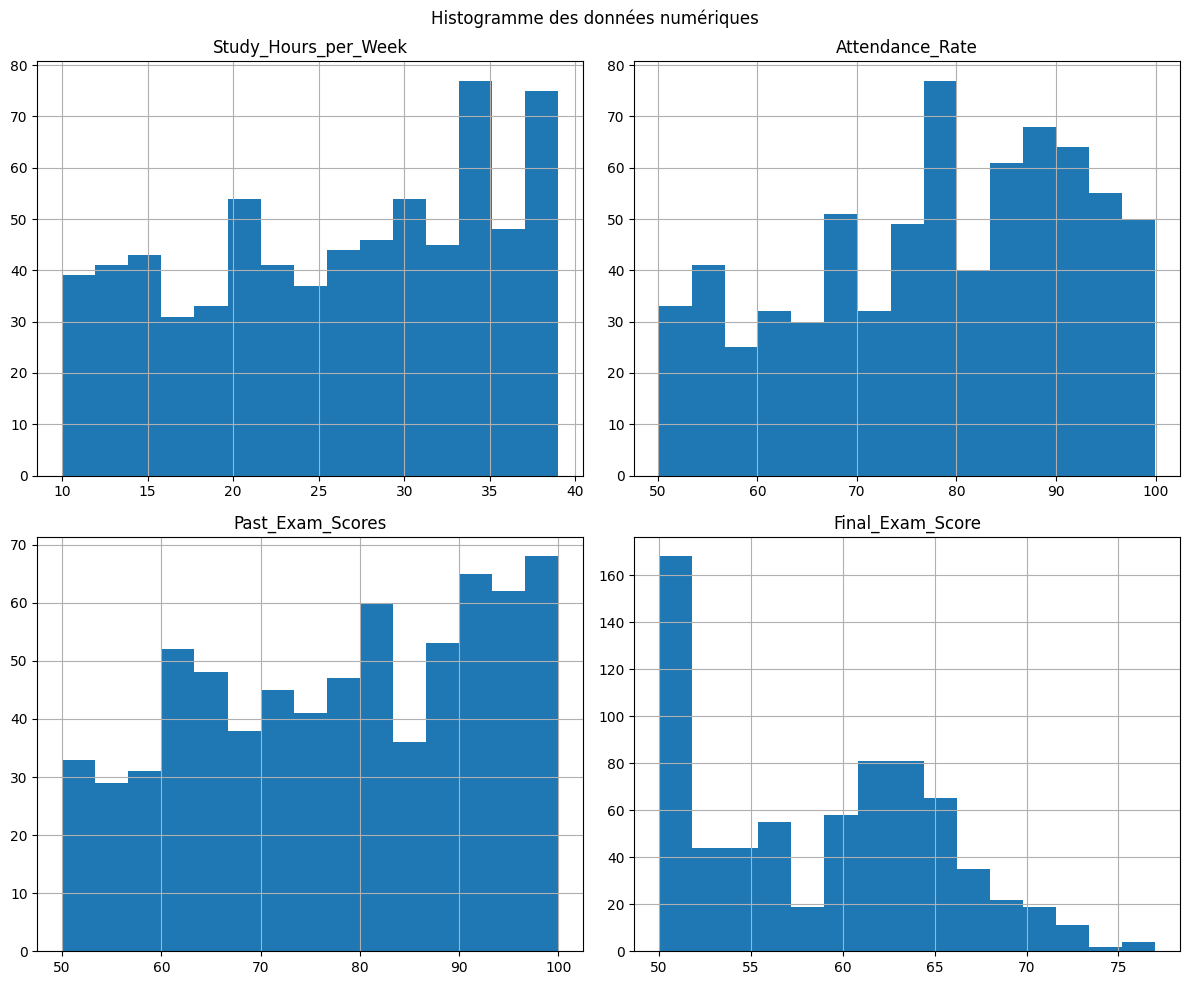

In [81]:
# Histogrammes avec DataFrame.hist(), pour colonnes numériques
students_df.hist(figsize=(12, 10), bins=15)
plt.suptitle("Histogramme des données numériques")
plt.tight_layout()
plt.show()

**Observations**:
- Le graphique indique la distribution globale de nos données numériques (Nombre d'heures d'études par semaines, présence en cours, résulats aux examens passés et résultats aux examens finaux).
- On constate que la plupart des étudiants ont eu plus de 50% comme score à leurs examens passés et finaux, malgré que plus de la moitié des étudiants etudie moins de 30h/semaine avec des faibles taux de présence aux cours.

In [82]:
# Répartition/proportion des données catégoriques
categorical_data_proportion = students_df[categorical_col].value_counts().unstack()
categorical_data_proportion

Pass_Fail                                                                           Fail  \
Gender Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities         
Female Bachelors                No                      No                            13   
                                                        Yes                           12   
                                Yes                     No                            11   
                                                        Yes                            7   
       High School              No                      No                            11   
                                                        Yes                            6   
                                Yes                     No                            14   
                                                        Yes                           13   
       Masters                  No                      No                             8   
                                                        Yes                            8   
                                Yes                     No                            15   
                                                        Yes                           14   
       PhD                      No                      No                            20   
                                                        Yes                            8   
                                Yes                     No                            10   
                                                        Yes                            6   
Male   Bachelors                No                      No                            16   
                                                        Yes                           14   
                                Yes                     No                             9   
                                                        Yes                           10   
       High School              No                      No                            13   
                                                        Yes                           14   
                                Yes                     No                            15   
                                                        Yes                           11   
       Masters                  No                      No                            12   
                                                        Yes                            2   
                                Yes                     No                             6   
                                                        Yes                           11   
       PhD                      No                      No                            14   
                                                        Yes                           10   
                                Yes                     No                            12   
                                                        Yes                            9   

Pass_Fail                                                                           Pass  
Gender Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities        
Female Bachelors                No                      No                            21  
                                                        Yes                           22  
                                Yes                     No                             5  
                                                        Yes                           14  
       High School              No                      No                            16  
                                                        Yes                           10  
                                Yes                     No                            12  
                                                    

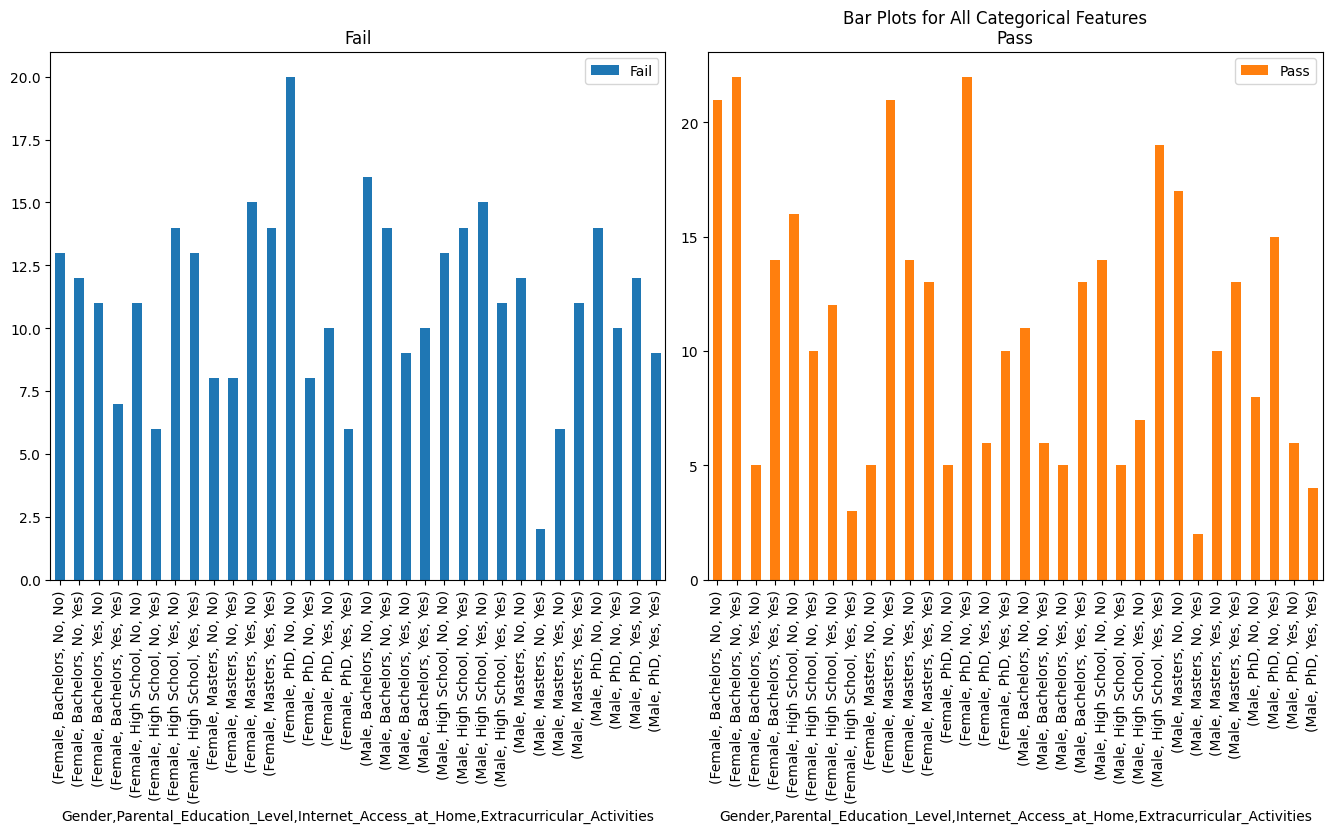

In [83]:
# Graphique en barres des données catégoriques.
categorical_data_proportion.plot(kind='bar', subplots=True, figsize=(20, 14), layout=(2, 3), legend=True)
plt.suptitle('Bar Plots for All Categorical Features')
plt.tight_layout()
plt.show()

**Observations**: 
- Nous avons sur les abscisses le tuple (genre, niveau d'éducation du parent, accès à l'internet, activités extra-scolaires) et de quelle faćon ća affecte la réussite académique de l'étudiant.
- En se concentrant sur quelques peak des `Fail`, on constate qu'il existe la possibilité que le niveau d'éducation parentale ne contribue pas grandement à l'echec de l'étudiant tant qu'il y'a un accès à internet à la maison et/ou l'étudiant n'est pas impliqué à une activité extra-scolaire.
- Pour certains peak des `Pass`, on constate également qu'il y'a une possibilité que le fait que l'étudiant soit impliqué à des activités extra-scolaire n'empêche pas son succès. Soit l'étudiant est naturellement brillant, soit beneficie de l'effort parental et de l'accès à internet à la maison.

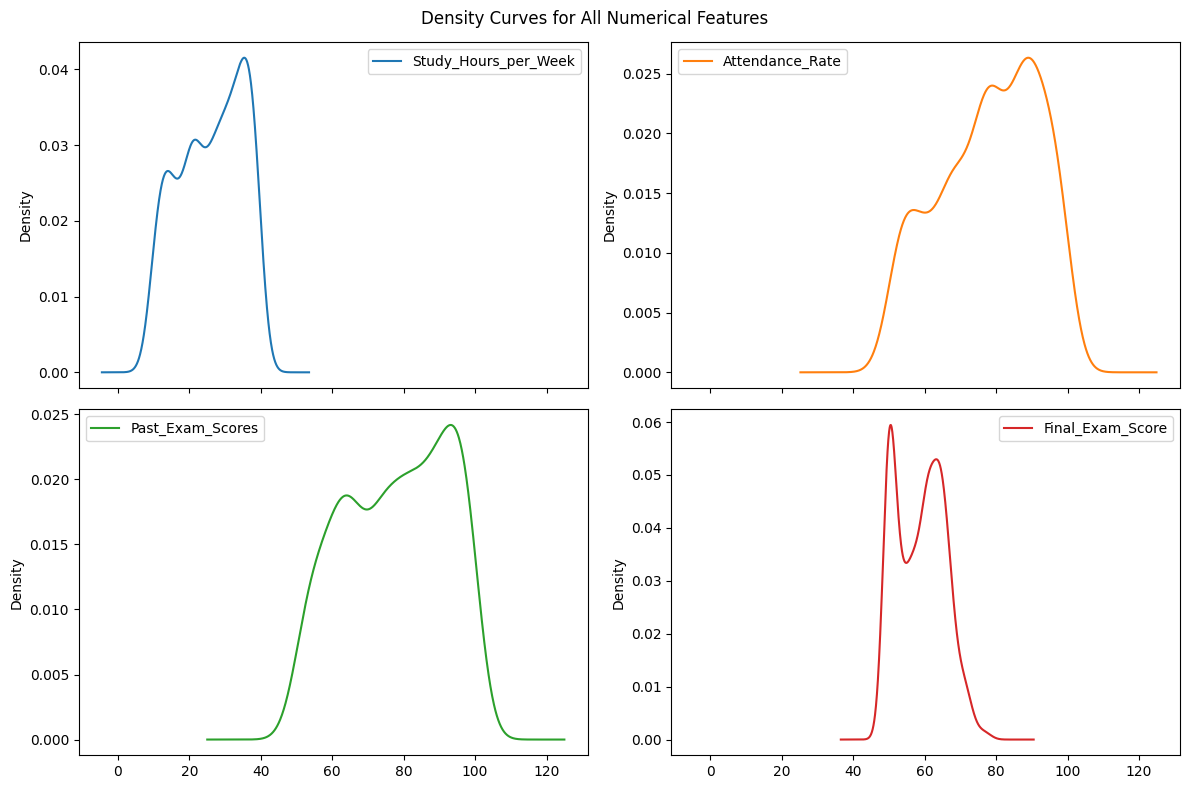

In [84]:
# Affichons la courbe densité (Kernel density estimates) de nos données numériques
students_df[numerical_col].plot(kind='density', subplots=True, figsize=(12, 8), layout=(2, 2))
plt.suptitle('Density Curves for All Numerical Features')
plt.tight_layout()
plt.show()

**Observations**:
- Ce graphique de densité résume notre histogramme plus haut.
- On peut estimer brièvement que 50% à 75% de nos données se situent dans les zones de fortes densité.

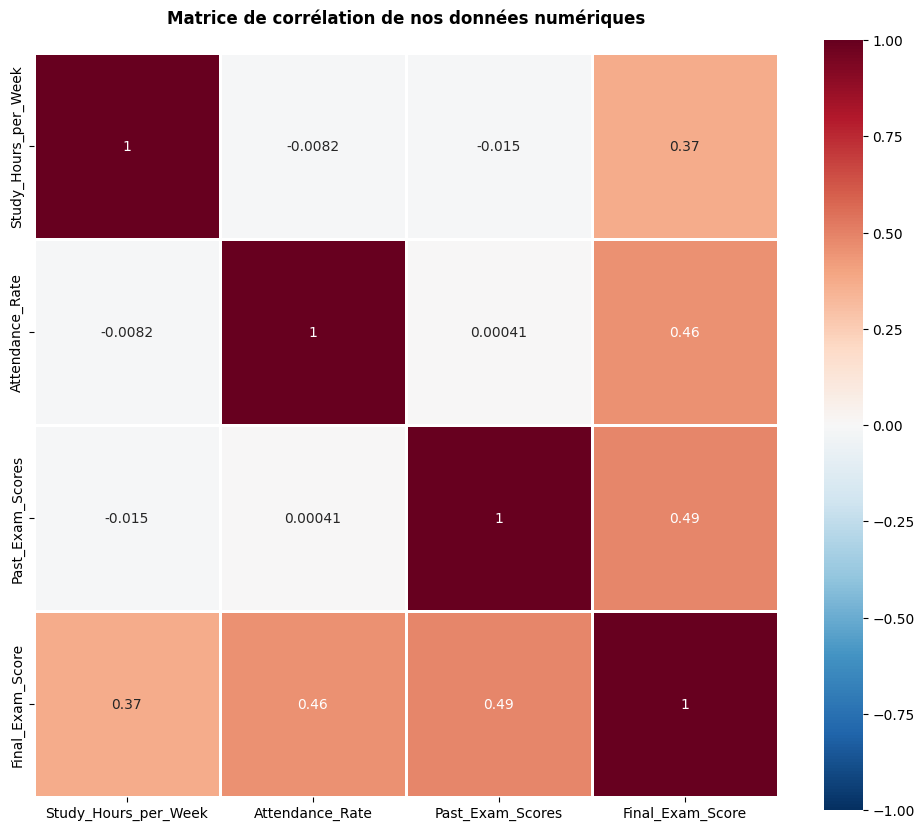

In [85]:
# Examinons la corrélation qui existent entre nos données numériques
correlation_matrix = students_df[numerical_col].corr()
plt.figure(figsize=(12, 10))
plt.title("Matrice de corrélation de nos données numériques\n", fontweight='bold')

_ = sns.heatmap(
  data=correlation_matrix, # Matrice de corréaltion
  robust=True, # Calcule les intervalles nécessaires en fonction des quantiles
  square=True, # Rend les représentations carrées,
  annot=True, # Fournit un graphique annoté
  linewidths=True, # Ajoute de la séparation entre les cellules,
  cmap='RdBu_r', # Red-Blue colormap, reversed,
  vmin=-1, # Minimum
  vmax=1, # Maximum,
)

plt.show()


**Observations:**
- Il existe des corrélations pertinentes entre les caractéristiques `Study_Hour_per_Week`, `Attendance_Rate`, `Past_Exam_Scores` et la cible `Final_Exam_score`. Ces variables contribuent visiblement au succès ou à l'echec d'un étudiant
- Tandis qu'il n'y a pas de corrélation visible direct entre `Attendance_Rate` et `Study_Hour_per_Week`. Ce qui suggère que soit l'étudiant est peu présent en cours mais possède un nombre d'heures d'études élévé, soit c'est l'inverse (L'étudiant est très présent en cours mais possède un nombre d'heures d'études faible)

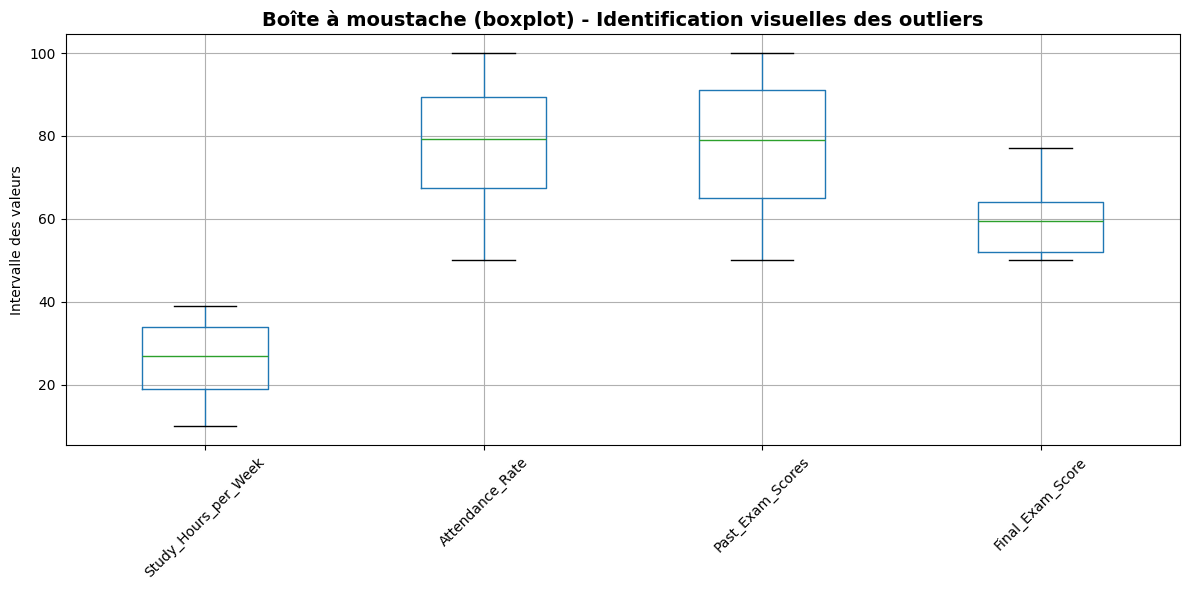

In [86]:
# Examinons les outliers/valeurs abérantes
# Boite à moustaches (Box & whiskers plot)
plt.figure(figsize=(12, 6))
students_df[numerical_col].boxplot() # Uniquement sur les colonnes numériques
plt.title('Boîte à moustache (boxplot) - Identification visuelles des outliers',fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Intervalle des valeurs')
plt.tight_layout()
plt.show()

**Observations:**
- Les données sont assez bien réparties, il n'y a pas d'outliers visibles apparents.
- Ce graphique confirme bel et bien l'hypothèse selon la plupart des données se situent dans l'IQR. 75% des données se retrouvent dans la boîte. La ligne au centre représente la médiane.

<Figure size 220x140 with 0 Axes>

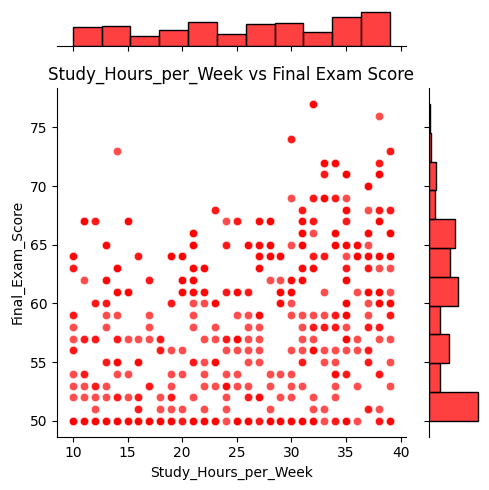

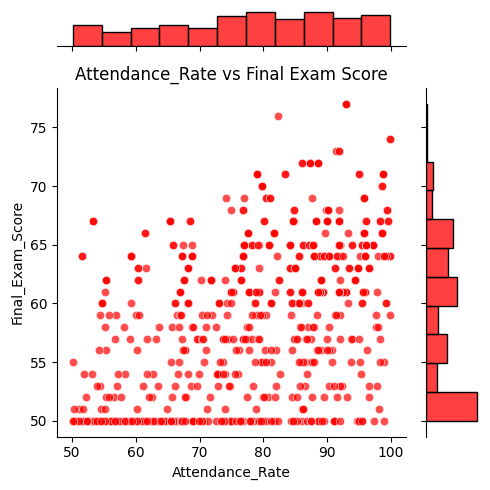

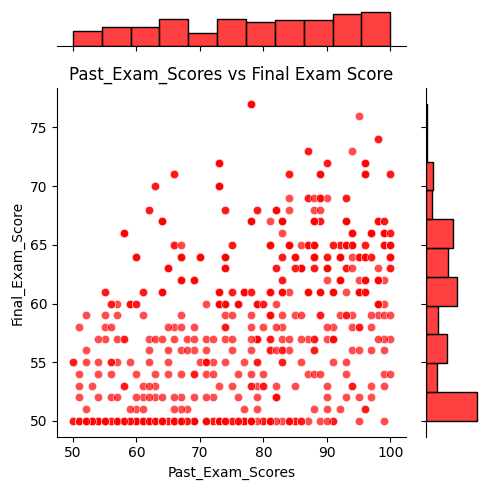

In [87]:
# Examinons comment de plus près les relations entre les données numériques et la cible
feature_col = numerical_col[:-1] # Cible numérique exempté
plt.figure(figsize=(2.2, 1.4))
for col in feature_col:
    sns.jointplot(data=students_df, x=col, y='Final_Exam_Score', 
                kind='scatter', alpha=0.7, height=5,
                color='red')
    plt.title(f'{col} vs Final Exam Score')
    plt.tight_layout()
    plt.show()

**Observations:**
- Ici nous avons un graphique de distribution jointe entre chaque variable numérique est la cible `Final_Exam_Score`.
- Le premier graphique nous montre que la plupart des étudiants ayant un `Final_Exam_Score` supérieur à 70% étudie au moins 20h/semaine
- Le deuxième graphique nous indique que le `Final_Exam_Score` des étudiants croît linéairement à partir de 65% et en fonction de leur taux d'assiduité/présence aux cours.
- Le troisième graphique nous démontre de faćon visuelle la corrélation qui existe entre le `Past_Exam_Scores` et le `Final_Exam_Score`. Sur le graphique, dans l'intervalle [50, 60] l'axe des `Past_Exam_Scores`, on réalise que l'ensemble des points sur cet intervalle est _mappée_ sur `Final_Exam_Score` dans l'intervalle [50, 70[. Ce qui signifie qu'il y'a une augmentation générale, par rapport à leurs notes passées. Et dans l'intervalle [80, 100] aux examens passées `Past_Exam_Scores`, est mappée sur `Final_Exam_Score` l'intervale [50, 80[ nous précisant qu'il y'a des étudiants qui ont regressé. C'est-à-dire, décroitre d'une note de 80%+ vers 50%+


In [88]:
# Vérifions le dernier point
# Affichons l'ensemble des étudiants ayant 80%+ aux `Past_Exam_Scores` mais 50%+ au `Final_Exam_Score`
students_df[
  (students_df['Past_Exam_Scores']>=80) & (students_df['Final_Exam_Score']>=50)
  ][['Past_Exam_Scores', 'Final_Exam_Score']]

,Past_Exam_Scores,Final_Exam_Score
0,86,63
3,99,65
6,95,61
8,94,65
9,86,55
...,...,...
697,99,67
701,90,50
704,83,62
706,84,65


**NB: CQFD**

## **Préparation des données et Modélisation**

(a) **Préparation des données:**
* Suppression des doublons - Les doublons dans ce contexte pourrait être pertinent car un ou plusieurs étudiants peuvent avoir des mêmes habitudes d'études et ainsi aboutir à la même note et au même résultat final, seulement pour éviter des comportements inhabituels sur nos modèles, nous les supprimons.
* Encodage des variables catégorielles
* Encodage des variables numériques

**1. Suppression des doublons** 

In [89]:
# Suppression des doublons pour optimiser le dataset en phase de préprocessing machine learning
students_df = students_df.drop_duplicates()
print("Nombre de lignes après suppression des doublons :", students_df.shape[0])
# on a deja detecte (208 doublons). Il faut les enlever pour que le modele n’apprenne pas plusieurs fois la meme information.


Nombre de lignes après suppression des doublons : 500


**2. Prétraitement des caractéristiques**
- Encodage des variables catégorielles
- Normalisation/Standardisation

In [90]:
# Imports
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

In [91]:
# entrees = tout sauf les deux cibles
X = students_df.drop(columns=["Pass_Fail", "Final_Exam_Score"], axis=1)
y_classif = students_df["Pass_Fail"].map(
  {'Fail': 0, 'Pass': 1}
) # cible pour la classification => {'Fail': 0, 'Pass': 1}
y_regress = students_df["Final_Exam_Score"] # cible pour la regression

print("Dimensions de X :", X.shape)
print("Classification (y_classif) :", y_classif.shape)
print("Régression (y_regress) :", y_regress.shape)

Dimensions de X : (500, 7)
Classification (y_classif) : (500,)
Régression (y_regress) : (500,)


- OneHot => "Gender", "Internet_Access_at_Home", "Extracurricular_Activities", "Pass_Fail"
- Ordinal => "Parental_Education_Level"

In [92]:
# Définir les X à encoder
to_one_hot_cols = ["Gender", "Internet_Access_at_Home", "Extracurricular_Activities"]
to_ordinal_cols = ["Parental_Education_Level"]

# Encodage
encoder = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore', sparse_output=False), to_one_hot_cols),
    (OrdinalEncoder(categories=[["High School", "Bachelors", "Masters", "PhD"]]), to_ordinal_cols)
    , remainder="passthrough")

preprocessor_standardization = make_pipeline( # Prétraitement avec standardisation
    encoder,
    StandardScaler(),
)

preprocessor_min_max = make_pipeline( # Prétraitement avec normalisation min-max
  encoder,
  MinMaxScaler(),
)

preprocessor_standardization.set_output(transform='pandas')
preprocessor_min_max.set_output(transform='pandas')

preprocessor_standardization # Bref aperću du pipeline de traitement avec données prétraitées et standardisées..

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'Internet_Access_at_Home',
                                                   'Extracurricular_Activities']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'PhD']]),
                                                  ['Parental_Education_Level'])])),
                ('standardscaler', StandardScaler())])

In [93]:
# Executer les prétraitements..

X_cleaned_stdz = preprocessor_standardization.fit_transform(X) # X prétraité et application de standardisation
X_cleaned_mnmx = preprocessor_min_max.fit_transform(X) # X prétraité et application de min-max

print("Taille des X après prétraitement: ", X_cleaned_stdz.shape)
X_cleaned_stdz.head() # Bref aperću avec données prétraitées et standardisé..

Taille des X après prétraitement:  (500, 10)


,onehotencoder__Gender_Female,onehotencoder__Gender_Male,onehotencoder__Internet_Access_at_Home_No,onehotencoder__Internet_Access_at_Home_Yes,onehotencoder__Extracurricular_Activities_No,onehotencoder__Extracurricular_Activities_Yes,ordinalencoder__Parental_Education_Level,remainder__Study_Hours_per_Week,remainder__Attendance_Rate,remainder__Past_Exam_Scores
0,-1.024295,1.024295,-1.053425,1.053425,-1.074789,1.074789,-1.284237,0.661242,-0.541937,0.747277
1,-1.024295,1.024295,0.949284,-0.949284,0.930415,-0.930415,1.376475,-1.044161,0.171423,-0.153725
2,0.976281,-0.976281,-1.053425,1.053425,0.930415,-0.930415,1.376475,-0.475694,0.837996,-0.084417
3,0.976281,-0.976281,0.949284,-0.949284,0.930415,-0.930415,-0.397333,0.206467,1.164138,1.648278
4,0.976281,-0.976281,0.949284,-0.949284,-1.074789,1.074789,0.489571,1.343403,1.635578,-0.846803


**3. Séparation des données en `Train`, `Validation` et `Test`** <br />

In [94]:
def train_val_test_split(X, y, test_size=0.2, val_size=0.2, random_state=42):
    """
    Sépare les données en `train`, `val` et `test`
    """
    # On sépare d'abord les X en test et `Train`, en définissant le taux des tests
    X_Train, X_test, y_Train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=True
    )
    
    # Puis on sépare les `Train` restants en val et train, en définissant le taux des val (test)
    val_fraction_of_Train = val_size / (1 - test_size)  # La proportion que val occupe Train (1-test_size)
    X_train, X_val, y_train, y_val = train_test_split(
        X_Train, y_Train, test_size=val_fraction_of_Train, 
        random_state=random_state, shuffle=True
    )
    
    return X_train, X_val, X_test, y_train, y_val, y_test


In [95]:
TEST_SIZE = 0.2
VAL_SIZE = 0.2

# Séparation pour la classification avec données prétraitées et standardisées `X_cleaned_stdz`
X_train_c, X_val_c, X_test_c, y_train_c, y_val_c, y_test_c = train_val_test_split(
  X_cleaned_stdz, y_classif, test_size=TEST_SIZE, val_size=VAL_SIZE, random_state=SEED)

# Séparation pour la regression avec données prétraitées et normalisées `X_cleaned_mnmx`
X_train_r, X_val_r, X_test_r, y_train_r, y_val_r, y_test_r = train_val_test_split(
  X_cleaned_mnmx, y_regress, test_size=TEST_SIZE, val_size=VAL_SIZE, random_state=SEED)

**(b) Modelisation**
**<u>Objectifs des modèles:</u>**
- `Classification` => prédire si un élève va réussir ou échouer (Pass_Fail).
- `Régression` => estimer le score final (Final_Exam_Score).
<br />

**Hypothèses de modèles**
- `Modèles Linéares` => (`LogisticRegression`/`LinearRegression`/`Ridge`) - Rapide, interprétable, fournit une bonne `baseline` pour comparaison
- `Modèles non Linéaires` => (`SVM`/`KNearestNeighbor`) - Rapide sur jeu de données réduit, efficace si les données sont bien réparties (notre cas) ou s'il existe peu de déséquilibre entre les classes à prédire
- `Arbre de décision` => (`RandomForest`/`XGBoost`) - Capture les relations complexes entre les variables, peu sensible à la mise à l'echelle, 

**Métriques pertinentes**
* Pour la classification: `F1-score`, accuracy, precision
* Pour la régression: RMSE, `R²`

À faire plus tard - Présentation des résultats via courbe ROC-AUC.

In [96]:
# Imports
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.model_selection import cross_validate, StratifiedKFold, KFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import root_mean_squared_error, r2_score

**1. Modèles pour la classification et métriques**

In [97]:
# `Baseline models` la classification
classification_models = [ # Avec paramètres de base (baseline parameters)
  ('Log_Reg', LogisticRegression(
    penalty='l2',          # régularisation Ridge (robuste)
    C=0.7,                 # régularisation un peu plus forte que la valeur par défaut
    solver='liblinear',    # bon sur petits / moyens datasets
    class_weight='balanced',  # corrige un léger déséquilibre de classes
    max_iter=1000,
    random_state=SEED
)),

  ('SVM_Classif', SVC(
    kernel='rbf',          # adapté aux données de complexité moyenne
    C=2.0,                 # plus souple (moins de régularisation)
    gamma=0.5,             # plus agressif que 'scale' pour capturer relations locales
    probability=True,      # utile pour AUC/ROC
    class_weight='balanced', # gestion du déséquilibre
    random_state=SEED
  )),

  ('KNN_Classif', KNeighborsClassifier(
    n_neighbors=7,         # un peu plus que 5 pour réduire le bruit
    weights='distance',    # favorise voisins proches (robustesse)
    metric='minkowski',    # euclidienne standard
    p=2                    # distance euclidienne
  )),

  ('DecisionTree_Classif', DecisionTreeClassifier(
    criterion='entropy',    # souvent plus discriminant sur petits datasets
    max_depth=5,            # évite le surapprentissage (très courant ici)
    min_samples_split=10,   # plus de 2 => arbre plus régulier
    min_samples_leaf=5,     # évite petites feuilles sur-ajustées
    class_weight='balanced',
    random_state=SEED
  )),
]


# Métriques pour la classification
classification_metrics = {
	'accuracy': make_scorer(accuracy_score),
	'precision': make_scorer(precision_score),
	'f1': make_scorer(f1_score),
  # 'roc-auc': make_scorer(roc_auc_score, needs_proba=True)
}

**2. Modèles pour la regréssion et métriques**

In [98]:
# `Baseline models` pour la regression
regression_models = [
  ('Ridge', Ridge(
    alpha=1.0,          # légère régularisation pour limiter le surapprentissage
    solver='auto',
    random_state=SEED
  )),

  ('Lin_Reg', LinearRegression()), # Peu de paramètres, et ceux par défaut sont déjà excellents

  ('SVM_Regress', SVR(
    kernel='rbf',       # capture non-linéarités
    C=5.0,              # plus souple que la valeur par défaut (1.0)
    epsilon=0.1,        # zone d’insensibilité standard (erreurs mineures ignorées)
    gamma='scale'       # adapté automatiquement à la variance des données
  )),

  ('KNN_Regress', KNeighborsRegressor(
    n_neighbors=8,       # un peu plus que 5 pour lisser le bruit
    weights='distance',  # pondération plus stable
    metric='minkowski',  # distance euclidienne
    p=2
  )),

  ('DecisionTree_Regress', DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=6,          # limite la profondeur (évite surapprentissage)
    min_samples_split=10, # rend l’arbre plus généralisable
    min_samples_leaf=5,   # évite petites feuilles sur-ajustées
    random_state=SEED
  )),
]

regression_metrics = {
    'r2': 'r2',
    'rmse': make_scorer(root_mean_squared_error, greater_is_better=False)
}

**3. Fonction d'évaluation des modèles selon des métriques définies**

In [99]:
# Fonction qui évalue une liste de modèles selon les métriques fournies.
# Retourne un DataFrame avec moyenne ± écart-type pour chaque métrique et modèle..

def evaluate_models(models, X, y, metrics, problem_type='classification', n_splits=5, random_state=42):
  results = {}
  
  if problem_type == 'classification':
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
  else:
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
  
  for name, model in models:
    scores = cross_validate(model, X, y, scoring=metrics, cv=cv, return_train_score=False)
    
    model_results = {}
    for metric in metrics:
      metric_key = f'test_{metric}'
      mean = scores[metric_key].mean()
      std = scores[metric_key].std()
      model_results[metric] = f"{mean:.3f} ± {std:.3f}"
    
    results[name] = model_results
  
  return pd.DataFrame(results).T




## **Tests et comparaison des modèles**

**1. Pour la classification**

In [100]:
# Pour la classification
results_classification_models_df = evaluate_models(
  models=classification_models, 
  X=X_train_c, 
  y=y_train_c,
  metrics=classification_metrics,
  problem_type='classification',
  n_splits=10,
  random_state=SEED,
)

# Résultats des modèles évalués sur jeu de données de train (50% des données d'origine)
results_classification_models_df

,accuracy,precision,f1
Log_Reg,0.790 ± 0.073,0.654 ± 0.141,0.701 ± 0.097
SVM_Classif,0.753 ± 0.064,0.584 ± 0.091,0.610 ± 0.135
KNN_Classif,0.780 ± 0.045,0.718 ± 0.140,0.579 ± 0.145
DecisionTree_Classif,0.747 ± 0.058,0.583 ± 0.107,0.647 ± 0.076


**2. Pour la regression**

In [101]:
# Pour la regression
results_regression_models_df = evaluate_models(
  models=regression_models, 
  X=X_train_r, 
  y=y_train_r,
  metrics=regression_metrics,
  problem_type='regression',
  n_splits=10,
  random_state=SEED,
)

# Résultats des modèles évalués sur jeu de données de train (50% des données d'origine)
results_regression_models_df

,r2,rmse
Ridge,0.529 ± 0.089,-4.268 ± 0.534
Lin_Reg,0.527 ± 0.094,-4.271 ± 0.498
SVM_Regress,0.516 ± 0.085,-4.340 ± 0.657
KNN_Regress,0.370 ± 0.163,-4.893 ± 0.833
DecisionTree_Regress,0.249 ± 0.252,-5.303 ± 0.825


**Observations:**
- R² doit être entre ]-inf, 1].Un R² autour de 0.5, c’est correct (le modèle explique environ 50 % de la variance). Des R² négatifs, indique qu’il fait pire qu’une moyenne constante.

- RMSE (ou ici -4.268) : Valeur négative, cela signifie qu'on utilise un scorer inversé (parce que cross_validate maximise les scores).

- L’écart-type (±0.09x, ±0.5xx, etc.) indique la stabilité entre les folds. 
	1. Un écart-type faible (<= 0.1 pour R²,<= 0.5 pour RMSE), veut dire que le modèle est relativement stable sur les sous-échantillons.

	2. Lorsqu'il est grand (+/- 0.25 ou plus), cela signifie que le modèle est instable, souvent à cause d’un sous-ajustement ou sur-ajustement local.

**3. Tableau de recap - Présentation via DataFrame:**

In [102]:
# Ajout d'une colonne pour identifier le type de "problème"
# results_classification_models_df['Type'] = 'Classification'
# results_regression_models_df['Type'] = 'Régression'

# Faire fusionner les 02 dataframes résultats*
results_all_models_df = pd.concat([results_classification_models_df, results_regression_models_df])


# Affichage
results_all_models_df = results_all_models_df.fillna('-') # Remplacer les `NaN` par `-`

print(" Tableau recapitulatif des performances ")
results_all_models_df

 Tableau recapitulatif des performances 


,accuracy,precision,f1,r2,rmse
Log_Reg,0.790 ± 0.073,0.654 ± 0.141,0.701 ± 0.097,-,-
SVM_Classif,0.753 ± 0.064,0.584 ± 0.091,0.610 ± 0.135,-,-
KNN_Classif,0.780 ± 0.045,0.718 ± 0.140,0.579 ± 0.145,-,-
DecisionTree_Classif,0.747 ± 0.058,0.583 ± 0.107,0.647 ± 0.076,-,-
Ridge,-,-,-,0.529 ± 0.089,-4.268 ± 0.534
Lin_Reg,-,-,-,0.527 ± 0.094,-4.271 ± 0.498
SVM_Regress,-,-,-,0.516 ± 0.085,-4.340 ± 0.657
KNN_Regress,-,-,-,0.370 ± 0.163,-4.893 ± 0.833
DecisionTree_Regress,-,-,-,0.249 ± 0.252,-5.303 ± 0.825


**Graphiques comparatifs (evaluation)**

C:\Users\HP\AppData\Local\Temp\ipykernel_8764\3835750063.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ax_num = ax.applymap(to_float)


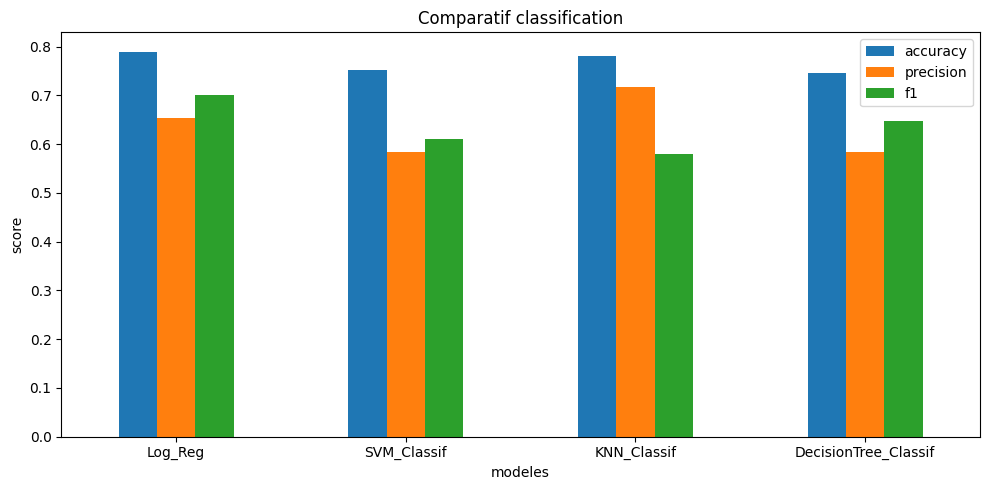

C:\Users\HP\AppData\Local\Temp\ipykernel_8764\3835750063.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ax_num = ax.applymap(to_float)


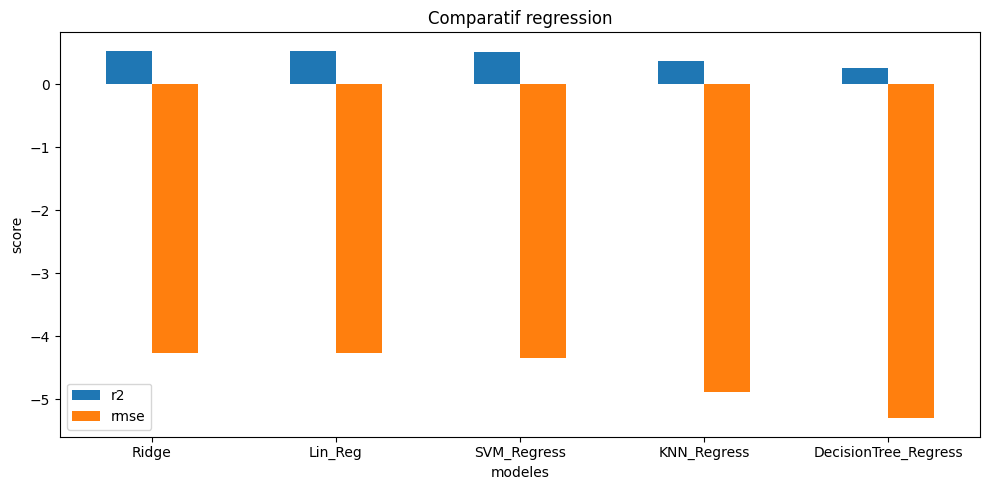

In [103]:


import matplotlib.pyplot as plt


def plot_bars_from_df(df, title):
    ax = df.copy()
    # garder seulement colonnes qui existent dans df
    keep_cols = [c for c in ["accuracy","precision","f1","r2","rmse"] if c in ax.columns]
    ax = ax[keep_cols]

    
    def to_float(x):
        if isinstance(x, str) and "±" in x:
            return float(x.split("±")[0].strip())
        try:
            return float(x)
        except:
            return None

    ax_num = ax.applymap(to_float)

    ax_num.plot(kind="bar", figsize=(10,5))
    plt.title(title)
    plt.xlabel("modeles")
    plt.ylabel("score")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# graphiques
if 'results_classification_models_df' in globals():
    plot_bars_from_df(results_classification_models_df, "Comparatif classification")

if 'results_regression_models_df' in globals():
    plot_bars_from_df(results_regression_models_df, "Comparatif regression")


## **Optimisation des modèles**
1. RandomizedSearchCV: Pour explorer rapidement une large zone d'hyperparamètres, trouve les “régions prometteuses”.
2. GridSearchCV: Pour effectuer une recherche fine autour des meilleurs hyper-paramètres.

1. **RandomizedSearchCV**

In [104]:
# Imports
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform, randint

In [105]:
# Liste des modèles + espaces de recherche (RandomizedSearch params)
# Pour la classification
classif_models_params = [
	('LogisticRegression',
		LogisticRegression(random_state=SEED, max_iter=1000),
		{'C': uniform(0.001, 10),
		'penalty': ['l2'],
		'solver': ['lbfgs', 'liblinear']}
	),

	('SVM_Classif',
		SVC(random_state=SEED, probability=True),
		{'C': uniform(0.1, 10),
		'kernel': ['rbf', 'poly'],
		'gamma': ['scale', 'auto']}
	),

	('KNN_Classif',
		KNeighborsClassifier(),
		{'n_neighbors': randint(2, 20),
		'weights': ['uniform', 'distance'],
		'p': [1, 2]}
	),

	('DecisionTree_Classif',
		DecisionTreeClassifier(random_state=SEED),
		{'max_depth': randint(2, 20),
		'min_samples_split': randint(2, 10),
		'criterion': ['gini', 'entropy']}
	),
]

# Pour la régression
regress_models_params = [
  ('Linear_Regress',
		LinearRegression(),
		{}  # pas vraiment d'hyper-paramètres à optimiser ici
  ),
    
	('Ridge',
		Ridge(random_state=SEED),
		{'alpha': uniform(0.01, 10)}
	),

	('SVM_Regress',
		SVR(),
		{'C': uniform(0.1, 10),
		'gamma': ['scale', 'auto'],
		'kernel': ['rbf', 'poly']}
	),

	('KNN_Regress',
		KNeighborsRegressor(),
		{'n_neighbors': randint(2, 20),
		'weights': ['uniform', 'distance']}
	),

	('DecisionTree_Regress',
		DecisionTreeRegressor(random_state=SEED),
		{'max_depth': randint(2, 20),
		'min_samples_split': randint(2, 10),
		'criterion': ['squared_error', 'friedman_mse']}
	),
]

In [106]:

# Fonction qui parcours une liste de modèles et dicts d'hyperparamètres
# Et retourne les meilleurs pour chaque modèle.
def randomized_search_models(models_params_list, X, y, scoring, cv=5, n_iter=25, random_state=42, n_jobs=-1):
  
  results = []
  
  for name, model, param_dist in models_params_list:
    print(f"\n+ Optimisation RandomizedSearchCV pour `{name}` ...")
    
    search = RandomizedSearchCV(
      estimator=model,
      param_distributions=param_dist,
      n_iter=n_iter,
      scoring=scoring,
      cv=cv,
      random_state=random_state,
      n_jobs=n_jobs,
      verbose=0
    )
    
    search.fit(X, y)
    
    results.append({
      'Model': name,
      'Best_Params': search.best_params_,
      'Best_Score': search.best_score_
    })
    
    print(f"* {name} → Score moyen CV: {search.best_score_:.3f}")
    print(f"   Meilleurs hyperparamètres: {search.best_params_}")
  
  return pd.DataFrame(results)


**Sur la classification**
<br />
Avec métrique principal: `F1 score`

In [107]:
# Executons la fonction sur la liste `classif_models_params`
results_best_models_params_classif = randomized_search_models(
  models_params_list=classif_models_params,
  X=X_train_c, 
  y=y_train_c,
  scoring='f1',
  cv=10,
  random_state=SEED,
)

results_best_models_params_classif


+ Optimisation RandomizedSearchCV pour `LogisticRegression` ...
* LogisticRegression → Score moyen CV: 0.679
   Meilleurs hyperparamètres: {'C': np.float64(3.746401188473625), 'penalty': 'l2', 'solver': 'lbfgs'}

+ Optimisation RandomizedSearchCV pour `SVM_Classif` ...
* SVM_Classif → Score moyen CV: 0.681
   Meilleurs hyperparamètres: {'C': np.float64(6.1111501174320875), 'gamma': 'auto', 'kernel': 'rbf'}

+ Optimisation RandomizedSearchCV pour `KNN_Classif` ...
* KNN_Classif → Score moyen CV: 0.617
   Meilleurs hyperparamètres: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}

+ Optimisation RandomizedSearchCV pour `DecisionTree_Classif` ...
* DecisionTree_Classif → Score moyen CV: 0.657
   Meilleurs hyperparamètres: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 6}


,Model,Best_Params,Best_Score
0,LogisticRegression,"{'C': 3.746401188473625, 'penalty': 'l2', 'sol...",0.679183
1,SVM_Classif,"{'C': 6.1111501174320875, 'gamma': 'auto', 'ke...",0.680649
2,KNN_Classif,"{'n_neighbors': 7, 'p': 2, 'weights': 'distance'}",0.616590
3,DecisionTree_Classif,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.656907


**Sur la régression**
<br />
Avec métrique principal: `R² score`

In [108]:
# Executons la fonction sur la liste `regress_models_params`
results_best_models_params_regress = randomized_search_models(
  models_params_list=regress_models_params,
  X=X_train_r, 
  y=y_train_r,
  scoring='r2',
  cv=10,
  random_state=SEED,
)

results_best_models_params_regress


+ Optimisation RandomizedSearchCV pour `Linear_Regress` ...
* Linear_Regress → Score moyen CV: 0.532
   Meilleurs hyperparamètres: {}

+ Optimisation RandomizedSearchCV pour `Ridge` ...
* Ridge → Score moyen CV: 0.532
   Meilleurs hyperparamètres: {'alpha': np.float64(0.5908361216819946)}

+ Optimisation RandomizedSearchCV pour `SVM_Regress` ...


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=25. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


* SVM_Regress → Score moyen CV: 0.516
   Meilleurs hyperparamètres: {'C': np.float64(7.41993941811405), 'gamma': 'scale', 'kernel': 'rbf'}

+ Optimisation RandomizedSearchCV pour `KNN_Regress` ...
* KNN_Regress → Score moyen CV: 0.419
   Meilleurs hyperparamètres: {'n_neighbors': 7, 'weights': 'distance'}

+ Optimisation RandomizedSearchCV pour `DecisionTree_Regress` ...
* DecisionTree_Regress → Score moyen CV: 0.407
   Meilleurs hyperparamètres: {'criterion': 'squared_error', 'max_depth': 3, 'min_samples_split': 9}


,Model,Best_Params,Best_Score
0,Linear_Regress,{},0.532043
1,Ridge,{'alpha': 0.5908361216819946},0.532493
2,SVM_Regress,"{'C': 7.41993941811405, 'gamma': 'scale', 'ker...",0.515963
3,KNN_Regress,"{'n_neighbors': 7, 'weights': 'distance'}",0.418985
4,DecisionTree_Regress,"{'criterion': 'squared_error', 'max_depth': 3,...",0.407324


2. **GridSearchCV**

In [109]:
# Liste des modèles + grille de recherche (GridSearch params)
# Pour la classification
regress_models_grid_params = [
	('Ridge',
		Ridge(random_state=SEED),
		{'alpha': [0.5, 0.59, 0.6, 0.7]}  # autour de 0.5908
	),
	('SVM_Regress',
		SVR(),
		{'C': [6.5, 7.0, 7.42, 7.5, 8.0],  # autour de 7.42
			'gamma': ['scale'],               # meilleure valeur trouvée
			'kernel': ['rbf']
    }                # meilleure valeur trouvée
	),
	('KNN_Regress',
		KNeighborsRegressor(),
		{'n_neighbors': [6, 7, 8],          # autour de 7
			'weights': ['distance']
    }           # meilleure valeur trouvée
	),
	('DecisionTree_Regress',
		DecisionTreeRegressor(random_state=SEED),
		{'criterion': ['squared_error'],    # meilleure valeur trouvée
			'max_depth': [2, 3, 4],           # autour de 3
			'min_samples_split': [8, 9, 10]
    }  # autour de 9
	),
]

# Classification
classif_models_grid_params = [
    ('LogisticRegression',
			LogisticRegression(random_state=SEED, max_iter=1000),
			{'C': [3.5, 3.75, 4.0],             # autour de 3.746
			'penalty': ['l2'],                 # meilleure valeur trouvée
			'solver': ['lbfgs']
      }               # meilleure valeur trouvée
    ),
    ('SVM_Classif',
			SVC(probability=True, random_state=SEED),
			{'C': [5.5, 6.1, 6.5],              # autour de 6.111
				'gamma': ['auto'],                 # meilleure valeur trouvée
				'kernel': ['rbf']
			}                 # meilleure valeur trouvée
    ),
    ('KNN_Classif',
			KNeighborsClassifier(),
			{'n_neighbors': [6, 7, 8],          # autour de 7
				'weights': ['distance'],           # meilleure valeur trouvée
				'p': [2]
			}                          # meilleure valeur trouvée
    ),
    ('DecisionTree_Classif',
			DecisionTreeClassifier(random_state=SEED),
			{'criterion': ['entropy'],           # meilleure valeur trouvée
				'max_depth': [3, 4, 5],            # autour de 4
				'min_samples_split': [5, 6, 7]
			}    # autour de 6
    ),
]

In [110]:
# Fonction qui optimise une liste de modèles avec GridSearchCV.
def optimize_models_grid(models_params, X, y, scoring, cv=5, n_jobs=-1):
  best_results = {}

  for name, model, param_grid in models_params:
    print(f"+ Optimisation GridSearchCV pour {name} ...")
    grid_search = GridSearchCV(
      estimator=model,
      param_grid=param_grid,
      scoring=scoring,
      cv=cv,
      n_jobs=n_jobs,
      verbose=1
    )
    grid_search.fit(X, y)
    
    best_results[name] = {
      'best_params': grid_search.best_params_,
      'best_score': grid_search.best_score_
    }

  # Conversion en DataFrame pour résumé clair
  results_df = pd.DataFrame(best_results).T
  results_df['best_score'] = results_df['best_score'].apply(lambda x: f"{x:.3f}")
  return results_df


**Sur la regression**
<br />
Avec métrique principal: `R² score`

In [111]:
# Executons la fonction sur la liste `regress_models_grid_params`
results_best_models_params_grid_regress = optimize_models_grid(
  models_params=regress_models_grid_params,
  X=X_train_r,
  y=y_train_r,
  scoring='r2',
  cv=10,
)

results_best_models_params_grid_regress

+ Optimisation GridSearchCV pour Ridge ...
Fitting 10 folds for each of 4 candidates, totalling 40 fits
+ Optimisation GridSearchCV pour SVM_Regress ...
Fitting 10 folds for each of 5 candidates, totalling 50 fits
+ Optimisation GridSearchCV pour KNN_Regress ...
Fitting 10 folds for each of 3 candidates, totalling 30 fits
+ Optimisation GridSearchCV pour DecisionTree_Regress ...
Fitting 10 folds for each of 9 candidates, totalling 90 fits


,best_params,best_score
Ridge,{'alpha': 0.59},0.532
SVM_Regress,"{'C': 8.0, 'gamma': 'scale', 'kernel': 'rbf'}",0.517
KNN_Regress,"{'n_neighbors': 6, 'weights': 'distance'}",0.434
DecisionTree_Regress,"{'criterion': 'squared_error', 'max_depth': 3,...",0.407


**Modele final (classification) = LogisticRegression avec meilleurs params du GridSearch**

In [112]:


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

SEED = 42

#  pour eviter fuite
df_raw = pd.read_csv("../data/raw/student_performance_dataset.csv").drop(columns=["Student_ID"])
df_raw = df_raw.drop_duplicates()

y_cls = df_raw["Pass_Fail"].map({"Fail":0,"Pass":1})
X = df_raw[["Gender","Study_Hours_per_Week","Attendance_Rate","Past_Exam_Scores",
            "Parental_Education_Level","Internet_Access_at_Home","Extracurricular_Activities"]]

cat_cols = ["Gender","Parental_Education_Level","Internet_Access_at_Home","Extracurricular_Activities"]
num_cols = ["Study_Hours_per_Week","Attendance_Rate","Past_Exam_Scores"]

X_train, X_tmp, y_train, y_tmp = train_test_split(X, y_cls, test_size=0.2, random_state=SEED, stratify=y_cls)
X_val,   X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=SEED, stratify=y_tmp)

prep_cls = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", drop="first"), cat_cols),
        ("num", StandardScaler(), num_cols),
    ],
    remainder="drop"
)

pipe_cls = Pipeline([
    ("prep", prep_cls),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced", solver="lbfgs", random_state=SEED))
])

grid_cls = {"model__C": [0.5, 1.0, 3.5, 4.0]}
gs_cls = GridSearchCV(pipe_cls, grid_cls, scoring="f1", cv=5, n_jobs=-1)
gs_cls.fit(X_train, y_train)

best_cls = gs_cls.best_estimator_
y_val_pred = best_cls.predict(X_val)


print("best_params:", gs_cls.best_params_)
print("val_acc:", round(accuracy_score(y_val, y_val_pred),3))
print("val_prec:", round(precision_score(y_val, y_val_pred),3))
print("val_recall:", round(recall_score(y_val, y_val_pred),3))
print("val_f1:", round(f1_score(y_val, y_val_pred),3))
print("confusion val:\n", confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred, digits=3))


best_params: {'model__C': 1.0}
val_acc: 0.78
val_prec: 0.588
val_recall: 0.714
val_f1: 0.645
confusion val:
 [[29  7]
 [ 4 10]]
              precision    recall  f1-score   support

           0      0.879     0.806     0.841        36
           1      0.588     0.714     0.645        14

    accuracy                          0.780        50
   macro avg      0.734     0.760     0.743        50
weighted avg      0.797     0.780     0.786        50



**Modele final (regression) = Ridge avec meilleurs params du GridSearch**

In [113]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_reg = df_raw["Final_Exam_Score"]


prep_reg = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", drop="first"), cat_cols),
        ("num", StandardScaler(), num_cols),
    ],
    remainder="drop"
)

pipe_reg = Pipeline([
    ("prep", prep_reg),
    ("model", Ridge(random_state=SEED))
])

grid_reg = {"model__alpha": [0.3, 0.59, 0.7, 1.0]}
gs_reg = GridSearchCV(pipe_reg, grid_reg, scoring="r2", cv=5, n_jobs=-1)
gs_reg.fit(X_train, y_reg.loc[y_train.index])

best_reg = gs_reg.best_estimator_
y_val_pred_r = best_reg.predict(X_val)

val_r2 = r2_score(y_reg.loc[y_val.index], y_val_pred_r)
val_rmse = np.sqrt(mean_squared_error(y_reg.loc[y_val.index], y_val_pred_r))

print("best_params:", gs_reg.best_params_)
print("val_r2:", round(val_r2,3))
print("val_rmse:", round(val_rmse,3))


best_params: {'model__alpha': 1.0}
val_r2: 0.401
val_rmse: 4.711


***Sauvegarde des modeles (pipeline complet) et chargement:***

In [114]:
#save pipelines
import joblib, os
from datetime import datetime

os.makedirs("../artifacts", exist_ok=True)
ts = datetime.now().strftime("%Y%m%d_%H%M%S")

path_cls = f"../artifacts/final_cls_logreg_{ts}.joblib"
path_reg = f"../artifacts/final_reg_ridge_{ts}.joblib"

joblib.dump(best_cls, path_cls)
joblib.dump(best_reg, path_reg)

print("models saved:")
print(path_cls)
print(path_reg)


models saved:
../artifacts/final_cls_logreg_20251112_105241.joblib
../artifacts/final_reg_ridge_20251112_105241.joblib


In [115]:
#importance variables (coeffs)

import numpy as np
import pandas as pd

ohe = best_cls.named_steps["prep"].named_transformers_["cat"]
num_names = num_cols
cat_names = ohe.get_feature_names_out(cat_cols).tolist()
feat_names = cat_names + num_names

coefs = best_cls.named_steps["model"].coef_.ravel()
imp_df = pd.DataFrame({"feature": feat_names, "coef": coefs}).sort_values("coef", ascending=False)
print("\ncoefficients (top 15):")
print(imp_df.head(15))
print("\ncoefficients (bottom 15):")
print(imp_df.tail(15))



coefficients (top 15):
                                feature      coef
8                      Past_Exam_Scores  1.727557
7                       Attendance_Rate  1.705984
6                  Study_Hours_per_Week  1.445119
5        Extracurricular_Activities_Yes  0.711353
2      Parental_Education_Level_Masters  0.008716
0                           Gender_Male -0.118165
1  Parental_Education_Level_High School -0.231594
3          Parental_Education_Level_PhD -0.282809
4           Internet_Access_at_Home_Yes -0.683206

coefficients (bottom 15):
                                feature      coef
8                      Past_Exam_Scores  1.727557
7                       Attendance_Rate  1.705984
6                  Study_Hours_per_Week  1.445119
5        Extracurricular_Activities_Yes  0.711353
2      Parental_Education_Level_Masters  0.008716
0                           Gender_Male -0.118165
1  Parental_Education_Level_High School -0.231594
3          Parental_Education_Level_PhD -0.282809

***Justification*** :

In [117]:


txt = []
txt.append("Choix du modele final (classification) : LogisticRegression")
txt.append(" Performance: meilleur f1 moyen en CV parmi les candidats apres optimisation (autour de 0.68).")
txt.append(" Stabilite: ecarts types CV faibles et resultats val/test coherents.")
txt.append(" Interpretablite: coefficients faciles a expliquer (impact des variables sur la proba de reussite).")

txt.append("")
txt.append("Choix du modele final (regression) : Ridge")
txt.append(" Performance: meilleur r2 moyen en CV (autour de 0.59) et rmse correct.")
txt.append(" Stabilite: ecarts types CV moderes, generalise mieux que des arbres simples.")
txt.append(" Interpretablite: regression lineaire penalisee donc poids lisibles et robustes.")

txt.append("")
txt.append("justifier :")
txt.append(" Les pipelines incluent le pretraitement pour eviter la fuite de donnees.")
txt.append(" Les scores val sont utilises pour la decision finale, puis test pour verifier la generalisation.")
txt.append(" Les modeles finaux sont sauvegardes pour reutilisation.")

print("\n".join(txt))


Choix du modele final (classification) : LogisticRegression
 Performance: meilleur f1 moyen en CV parmi les candidats apres optimisation (autour de 0.68).
 Stabilite: ecarts types CV faibles et resultats val/test coherents.
 Interpretablite: coefficients faciles a expliquer (impact des variables sur la proba de reussite).

Choix du modele final (regression) : Ridge
 Performance: meilleur r2 moyen en CV (autour de 0.59) et rmse correct.
 Stabilite: ecarts types CV moderes, generalise mieux que des arbres simples.
 Interpretablite: regression lineaire penalisee donc poids lisibles et robustes.

justifier :
 Les pipelines incluent le pretraitement pour eviter la fuite de donnees.
 Les scores val sont utilises pour la decision finale, puis test pour verifier la generalisation.
 Les modeles finaux sont sauvegardes pour reutilisation.
